In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import csv

In [2]:
def loadFreqs(freqLocation, identifyingVCFLocation, cNum, vcfHeaderLines):
    lociToFreqs = {}
    with open('{}/chr{}.afreq'.format(freqLocation, cNum)) as freqFile, \
            open('{}/chr{}.vcf'.format(identifyingVCFLocation, cNum)) as vcfFile:
        freqReader = csv.reader(freqFile, delimiter='\t')
        vcfReader = csv.reader(vcfFile, delimiter='\t')

        #skip header lines
        next(freqReader)
        for _ in range(vcfHeaderLines):
            next(vcfReader)


        count = 0
        for freqRow, vcfRow in zip(freqReader, vcfReader):
            count += 1
            if freqRow[1] != vcfRow[2]:
                print("Mismatched vcf and afreq IDs at variant {}".format(count))
                1/0
            variantKey = tuple(vcfRow[i] for i in[0,1,3,4])
            if variantKey in lociToFreqs:
                print("Already encountered variant {}".format(count))
                1/0
            lociToFreqs[variantKey] = freqRow[4]

            if count % 100000 == 0:
                print("{} Count {}k   ".format(cNum, count/1000), end='\r')
            
    print("Chr {} done                          ".format(cNum), end='\r')
    return lociToFreqs

In [15]:
def graph_entire(title, a, b, c, a2, b2, c2, filteredSNPs):
    graph_xs = xs[:variantCount]
    graph_ys = ys[:variantCount]
    #plt.hexbin(graph_xs, graph_ys, gridsize=100, cmap='viridis')
    fig, axes = plt.subplots()
    _, _, _, hist = axes.hist2d(graph_xs, graph_ys, bins=50, cmap='viridis', cmin=1, norm=colors.LogNorm())
    line = np.linspace(0, 1, 1000)
    axes.plot(line, line)
    axes.plot(line, a*line**2 + b*line + c, 'r', label="Proposed filtering cutoff")
    axes.plot(line, a2*line**2 + b2*line + c2, 'r')
    axes.scatter(*zip(*filteredSNPs.values()), c='y')
    fig.colorbar(hist, label='count in bin')
    axes.set_xlabel('SNPSTR allele freqs')
    axes.set_ylabel('UKB hap allele freqs')
    axes.legend()
    axes.set_title(title)
    plt.show()
    
def graph_low_freq(title):
    graph_xs = xs[np.logical_and(xs <= 0.1, ys <= 0.1)][:variantCount]
    graph_ys = ys[np.logical_and(xs <= 0.1, ys <= 0.1)][:variantCount]
    #plt.hexbin(graph_xs, graph_ys, gridsize=100, cmap='viridis')
    fig, axes = plt.subplots()
    _, _, _, hist = axes.hist2d(graph_xs, graph_ys, bins=50, cmap='viridis', cmin=1, norm=colors.LogNorm())
    line = np.linspace(0, 0.1, 1000)
    fig.colorbar(hist, label='count in bin')
    axes.plot(line, line)
    axes.set_xlabel('SNPSTR allele freqs')
    axes.set_ylabel('UKB hap allele freqs')
    axes.set_title(title)
    plt.show()

In [12]:
*zip(*filteredSNPs.values()))

(0.000994036, 0.000994036, 0.999006, 0.0, 0.459245, 0.0646123, 0.277336, 0.190855, 0.534791, 0.233598, 0.298211, 0.170974, 0.961233, 0.439364, 0.000994036, 0.0159046, 0.653082, 0.652087, 0.468191, 0.700795, 0.00795229, 0.461233, 0.801193, 0.567594, 0.409543, 0.0109344, 0.771372, 0.00894632, 0.329026, 0.242545, 0.50497, 0.0109344, 0.473161, 0.997018, 0.459245, 0.0, 0.638171, 0.600398, 0.266402, 0.456262, 0.341948, 0.414513, 0.475149, 0.00298211, 0.270378, 0.0, 0.999006, 0.462227, 0.336978, 0.082505, 0.000994036, 0.596421, 0.517893, 0.248509, 0.246521, 0.815109, 0.250497, 0.255467, 0.27833, 0.0, 0.0984095, 0.0656064, 0.43837, 0.00198807, 0.244533, 0.0198807, 0.497018, 0.637177, 0.176938, 0.49006, 0.393638, 0.0357853, 0.0, 0.714712, 0.403579, 0.423459, 0.0, 0.000994036, 0.663022, 0.650099, 0.0318091, 0.451292, 0.415507, 0.000994036, 0.0705765, 0.15507, 0.456262, 0.0318091, 0.417495, 0.50994, 0.418489, 0.49006, 0.264414, 0.748509, 0.476143, 0.635189, 0.911531, 0.563618, 0.636183, 0.402584,

In [3]:
variantCount = 0
xs = np.zeros(1000000)
ys = np.zeros(1000000)

for cNum in range(1,23):
    snpstrFreqs = loadFreqs("/projects/ps-gymreklab/jmargoli/ukbiobank/pre_imputation_qc/allele_freqs/snpstr",
                            "/projects/ps-gymreklab/jmargoli/ukbiobank/snpstr/vcf_1_sample", cNum, 11)
    hapFreqs = loadFreqs("/projects/ps-gymreklab/jmargoli/ukbiobank/pre_imputation_qc/allele_freqs/hap",
                            "/projects/ps-gymreklab/jmargoli/ukbiobank/microarray/vcf_1_sample", cNum, 6)
    commonKeys = set(snpstrFreqs.keys()).intersection(set(hapFreqs.keys()))
    for key in commonKeys:
        xs[variantCount] = snpstrFreqs[key]
        ys[variantCount] = hapFreqs[key]
        variantCount += 1


/home/jmargoli/anaconda3/envs/ukb_analysis/lib/python3.6/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


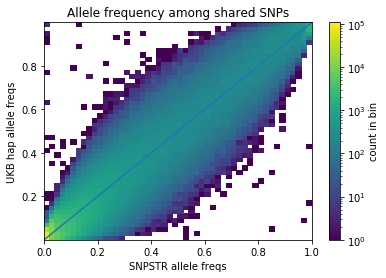

In [4]:
graph_entire('Allele frequency among shared SNPs')

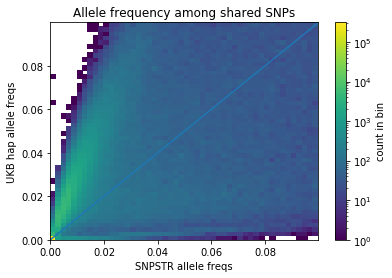

In [6]:
graph_low_freq('Allele frequency among shared SNPs')

In [4]:
variantCount = 0
xs = np.zeros(1000000)
ys = np.zeros(1000000)
hapFreqs = {}
snpstrFreqs = {}

for cNum in range(1,23):
#for cNum in range(22,23):
    hapFreqs.update(loadFreqs("/projects/ps-gymreklab/jmargoli/ukbiobank/pre_imputation_qc/allele_freqs/hap_white_brit_high_quality_sane_kinship_unrelated",
                            "/projects/ps-gymreklab/jmargoli/ukbiobank/microarray/vcf_1_sample", cNum, 6))
    snpstrFreqs.update(loadFreqs("/projects/ps-gymreklab/jmargoli/ukbiobank/pre_imputation_qc/allele_freqs/snpstr_eur",
                            "/projects/ps-gymreklab/jmargoli/ukbiobank/snpstr/vcf_1_sample", cNum, 11))

commonKeys = set(snpstrFreqs.keys()).intersection(set(hapFreqs.keys()))
for key in commonKeys:
    xs[variantCount] = snpstrFreqs[key]
    ys[variantCount] = hapFreqs[key]
    variantCount += 1

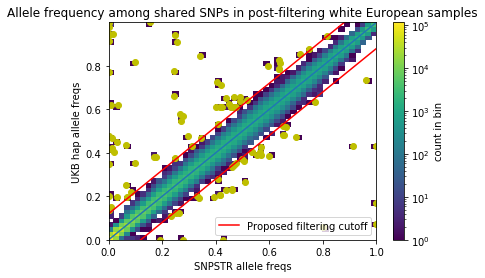

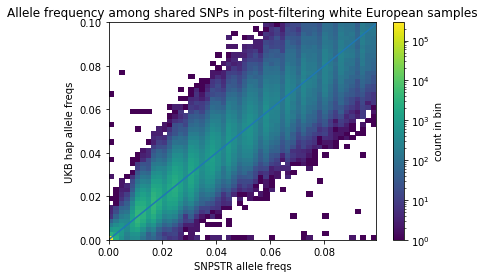

In [16]:
filteredSNPs = {}
for key in commonKeys:
    if abs(float(snpstrFreqs[key]) - float(hapFreqs[key])) > 0.12:
        filteredSNPs[key[:2]] = (float(snpstrFreqs[key]), float(hapFreqs[key]))

graph_entire('Allele frequency among shared SNPs in post-filtering white European samples', 0, 1, -0.12, 0, 1, 0.12, filteredSNPs)
graph_low_freq('Allele frequency among shared SNPs in post-filtering white European samples')

In [20]:
filteredSNPs = {}
for key in commonKeys:
    if abs(float(snpstrFreqs[key]) - float(hapFreqs[key])) > 0.12:
        filteredSNPs[key[:2]] = (float(snpstrFreqs[key]), float(hapFreqs[key]))

In [23]:
from collections import Counter

counter = Counter(list(zip(*filteredSNPs.keys()))[0]) 
for i in range(1, 23):
    print(i, counter[str(i)])

1 7
2 34
3 3
4 3
5 1
6 19
7 2
8 2
9 1
10 5
11 5
12 3
13 2
14 2
15 4
16 3
17 3
18 1
19 5
20 3
21 1
22 1


In [31]:
with open("filtered_snps.bed", 'w') as filtered_file:
    for snp in filteredSNPs:
        filtered_file.write(f"{snp[0]}\t{int(snp[1]) - 1}\t{snp[1]}\n")plink2 --pfile $UKB/microarray/pfile_converted/chr21 --exclude bed0 $UKB/pre_imputation_qc/allele_freqs/filtered_snps.bed --write-snplist
        
#plink2 --pfile $UKB/microarray/pfile_converted/chr21 --exclude bed0 $UKB/pre_imputation_qc/allele_freqs/filtered_snps.bed --write-snplist